In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(color_codes=True)
import sklearn

In [5]:
import warnings
warnings.simplefilter(action= "ignore",category=FutureWarning)

In [44]:
# To find encodings that work

# Below line creates a set of all available encodings
alias_values = set(aliases.values())

for encoding in set(aliases.values()):
    try:
        df=pd.read_csv("crime.csv", nrows=10, encoding=encoding) # read in only 10 lines for faster read
        print('successful', encoding)
    except:
        pass

In [45]:
# Read in the crime.csv file and use the timestamp as a datetime index
mushroom = pd.read_csv("mushroom_cleaned.csv", encoding="ISO-8859-11")

In [12]:
mushroom.head()

,cap-diameter,cap-shape,gill-attachment,gill-color,stem-height,stem-width,stem-color,season,class
0,1372,2,2,10,3.807467,1545,11,1.804273,1
1,1461,2,2,10,3.807467,1557,11,1.804273,1
2,1371,2,2,10,3.612496,1566,11,1.804273,1
3,1261,6,2,10,3.787572,1566,11,1.804273,1
4,1305,6,2,10,3.711971,1464,11,0.943195,1


In [14]:
mushroom.shape

(54035, 9)

In [15]:
mushroom.duplicated().sum() # Counting the duplicate rows

303

In [16]:
mushroom.drop_duplicates(inplace=True)

In [21]:
mushroom['class'].value_counts()

class
1    29372
0    24360
Name: count, dtype: int64

In [17]:
mushroom.shape

(53732, 9)

In [18]:
mushroom.head()

,cap-diameter,cap-shape,gill-attachment,gill-color,stem-height,stem-width,stem-color,season,class
0,1372,2,2,10,3.807467,1545,11,1.804273,1
1,1461,2,2,10,3.807467,1557,11,1.804273,1
2,1371,2,2,10,3.612496,1566,11,1.804273,1
3,1261,6,2,10,3.787572,1566,11,1.804273,1
4,1305,6,2,10,3.711971,1464,11,0.943195,1


In [19]:
mushroom.info()

<class 'pandas.core.frame.DataFrame'>
Index: 53732 entries, 0 to 54034
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   cap-diameter     53732 non-null  int64  
 1   cap-shape        53732 non-null  int64  
 2   gill-attachment  53732 non-null  int64  
 3   gill-color       53732 non-null  int64  
 4   stem-height      53732 non-null  float64
 5   stem-width       53732 non-null  int64  
 6   stem-color       53732 non-null  int64  
 7   season           53732 non-null  float64
 8   class            53732 non-null  int64  
dtypes: float64(2), int64(7)
memory usage: 4.1 MB


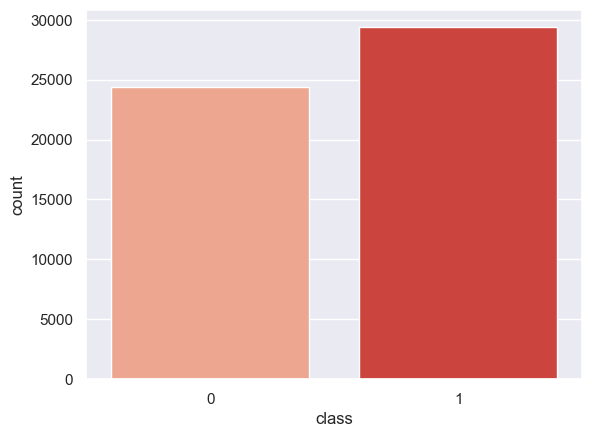

In [23]:
#check credit.policy
sns.countplot(x="class",data=mushroom, palette="Reds")
plt.show()

In [24]:
mushroom.sample(5)

,cap-diameter,cap-shape,gill-attachment,gill-color,stem-height,stem-width,stem-color,season,class
10912,47,6,0,10,0.087963,50,6,0.888450,0
40467,291,0,0,4,0.266167,231,11,0.027372,0
53094,988,3,3,2,0.891719,2612,6,0.027372,1
1948,710,0,2,10,2.657539,1262,11,0.943195,1
12562,106,6,1,5,1.568147,202,6,0.943195,1


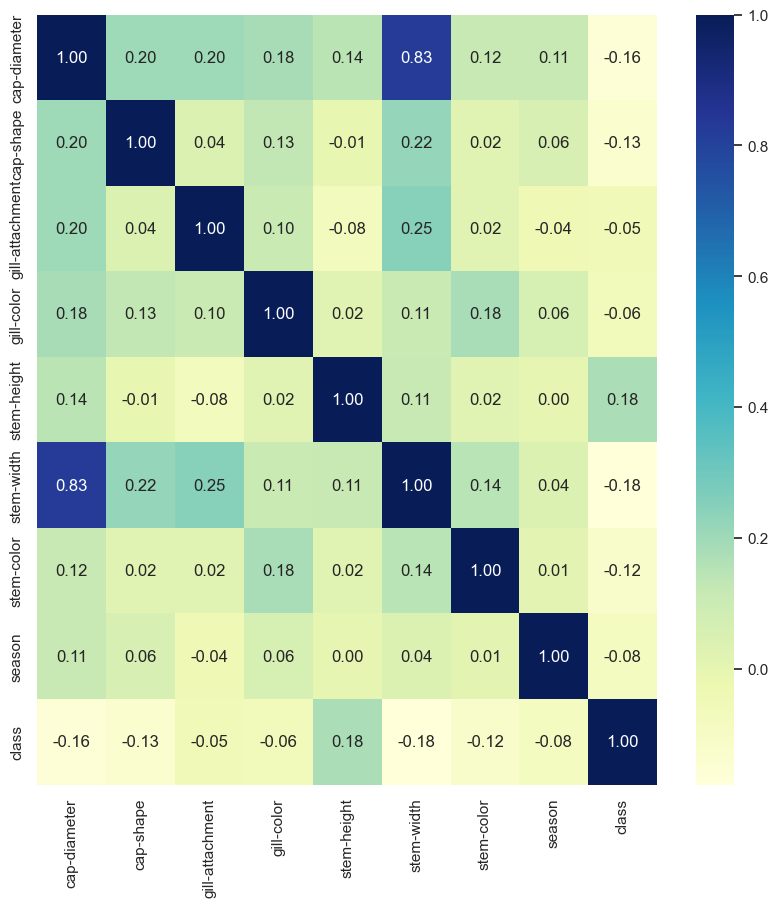

In [25]:
plt.subplots(figsize=(10, 10))
sns.heatmap(mushroom.corr(), cmap = "YlGnBu", annot=True, fmt=".2f")
plt.show()

In [26]:
mushroom.head(2)

,cap-diameter,cap-shape,gill-attachment,gill-color,stem-height,stem-width,stem-color,season,class
0,1372,2,2,10,3.807467,1545,11,1.804273,1
1,1461,2,2,10,3.807467,1557,11,1.804273,1


In [27]:
# Split data to be used in the models
# Create matrix of features
x = mushroom.drop('class', axis = 1) # grabs everything else but 'Price'

# Create target variable
y = mushroom['class'] # y is the column we're trying to predict

In [28]:
from sklearn import preprocessing
pre_process = preprocessing.StandardScaler().fit(x)
x_transform = pre_process.fit_transform(x)

In [29]:
y.shape

(53732,)

In [30]:
# Use x and y variables to split the training data into train and test set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_transform, y, test_size = .10, random_state = 101)

In [31]:
# 1. LOGISTIC REGRESSION

# Import model
from sklearn.linear_model import LogisticRegression

print('Logistic Regression')
# Create instance of model
log_reg = LogisticRegression()

# Pass training data into model
log_reg.fit(x_train, y_train)

Logistic Regression


LogisticRegression()

In [32]:
from sklearn.metrics import accuracy_score
# prediction from the model
y_pred_log_reg = log_reg.predict(x_test)
# Score It

print('Logistic Regression')
# Accuracy
print('--'*30)
log_reg_accuracy = round(accuracy_score(y_test, y_pred_log_reg) * 100,2)
print('Accuracy', log_reg_accuracy,'%')

Logistic Regression
------------------------------------------------------------
Accuracy 63.97 %


Precision: 0.65
Recall: 0.73
------------------------------------------------------------
[[1323 1156]
 [ 780 2115]]


<Axes: >

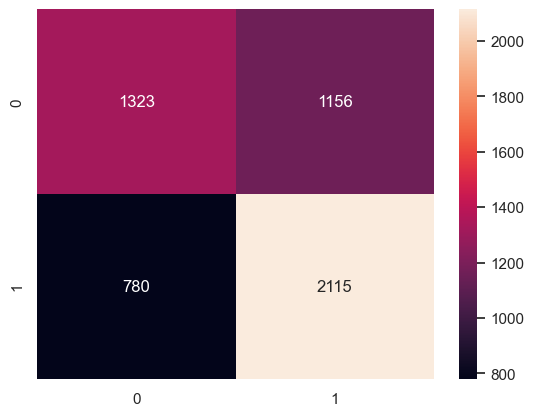

In [33]:
from sklearn.metrics import precision_score, recall_score, confusion_matrix
# Calculate precision and recall
precision = precision_score(y_test, y_pred_log_reg)
recall = recall_score(y_test, y_pred_log_reg)

# Print the results
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print("--"*30)
# Calculate confusion matrix
confusion = confusion_matrix(y_test, y_pred_log_reg)
print(confusion)
sns.heatmap(confusion, annot=True, fmt="d")

In [34]:
# 2. Decision Tree

from sklearn.tree import DecisionTreeClassifier

print('Decision Tree Classifier')
# Create instance of model
Dtree = DecisionTreeClassifier()

# Pass training data into model
Dtree.fit(x_train, y_train)

Decision Tree Classifier


DecisionTreeClassifier()

In [35]:
from sklearn.metrics import accuracy_score
# prediction from the model
y_pred_Dtree = Dtree.predict(x_test)
# Score It

print('Decision Tree Classifier')
# Accuracy
print('--'*30)
Dtree_accuracy = round(accuracy_score(y_test, y_pred_Dtree) * 100,2)
print('Accuracy', Dtree_accuracy,'%')

Decision Tree Classifier
------------------------------------------------------------
Accuracy 97.84 %


Precision: 0.98
Recall: 0.98
------------------------------------------------------------


<Axes: >

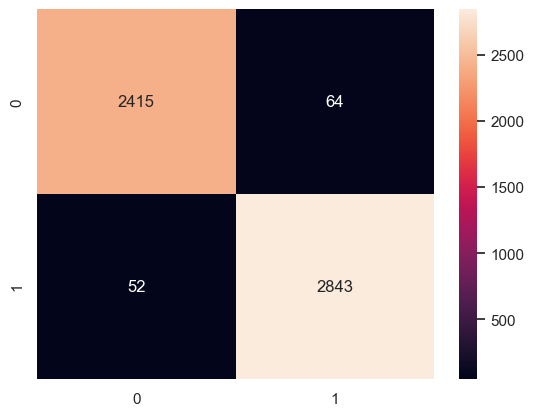

In [36]:
from sklearn.metrics import precision_score, recall_score, confusion_matrix
# Calculate precision and recall
precision = precision_score(y_test, y_pred_Dtree)
recall = recall_score(y_test, y_pred_Dtree)
Dtree_accuracy = round(accuracy_score(y_test, y_pred_Dtree) * 100,2)

# Print the results
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')

print("--"*30)
# Calculate confusion matrix
confusion = confusion_matrix(y_test, y_pred_Dtree)

sns.heatmap(confusion, annot=True, fmt="d")

In [37]:
# 3. Random Forest

from sklearn.ensemble import RandomForestClassifier

print('Random Forest Classifier')
# Create instance of model
rfc = RandomForestClassifier()

# Pass training data into model
rfc.fit(x_train, y_train)

Random Forest Classifier


RandomForestClassifier()

In [38]:
from sklearn.metrics import accuracy_score
# prediction from the model
y_pred_rfc = rfc.predict(x_test)
# Score It

print('Random Forest Classifier')
# Accuracy
print('--'*30)
rfc_accuracy = round(accuracy_score(y_test, y_pred_rfc) * 100,2)
print('Accuracy', rfc_accuracy,'%')

Random Forest Classifier
------------------------------------------------------------
Accuracy 99.2 %


Precision: 0.99
Recall: 0.99
------------------------------------------------------------


<Axes: >

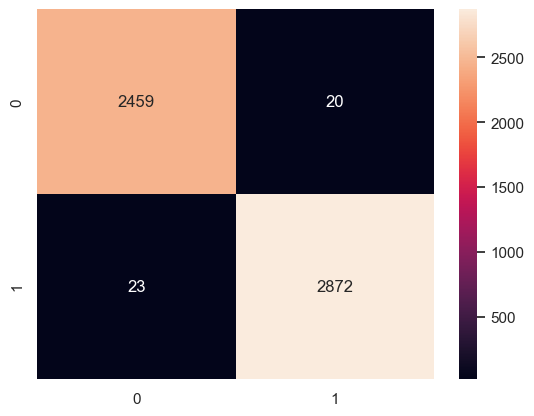

In [39]:
from sklearn.metrics import precision_score, recall_score, confusion_matrix
# Calculate precision and recall
precision = precision_score(y_test, y_pred_rfc)
recall = recall_score(y_test, y_pred_rfc)

# Print the results
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print("--"*30)
# Calculate confusion matrix
confusion = confusion_matrix(y_test, y_pred_rfc)
sns.heatmap(confusion, annot=True, fmt="d")

In [40]:
# 4. Gradient Bossting Classifier

from sklearn.ensemble import GradientBoostingClassifier

print('Gradient Boosting Classifier')
# Create instance of model
gbc = GradientBoostingClassifier()

# Pass training data into model
gbc.fit(x_train, y_train)

Gradient Boosting Classifier


GradientBoostingClassifier()

In [41]:
from sklearn.metrics import accuracy_score
# prediction from the model
y_pred_gbc = gbc.predict(x_test)
# Score It

print('Gradient Boosting Classifier')
# Accuracy
print('--'*30)
gbc_accuracy = round(accuracy_score(y_test, y_pred_gbc) * 100,2)
print('Accuracy', gbc_accuracy,'%')

Gradient Boosting Classifier
------------------------------------------------------------
Accuracy 87.83 %


Precision: 0.89
Recall: 0.89
------------------------------------------------------------


<Axes: >

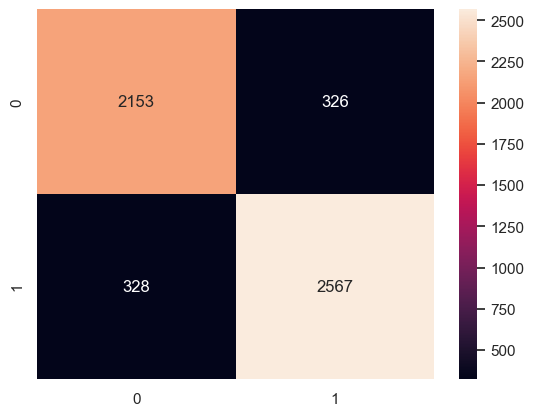

In [42]:
from sklearn.metrics import precision_score, recall_score, confusion_matrix
# Calculate precision and recall
precision = precision_score(y_test, y_pred_gbc)
recall = recall_score(y_test, y_pred_gbc)

# Print the results
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print("--"*30)
# Calculate confusion matrix
confusion = confusion_matrix(y_test, y_pred_gbc)
sns.heatmap(confusion, annot=True, fmt="d")

In [43]:
# Sample model scores (replace these with your actual model scores)
model_scores = {
    "Logistic Regression": log_reg_accuracy,
    "Decision Tree Classifier": Dtree_accuracy,
    "Random Forest Classifier": rfc_accuracy,
    "Gradient Boosting Classifier": gbc_accuracy
}

# Sort the model scores in descending order based on their values (higher values first)
sorted_scores = sorted(model_scores.items(), key=lambda x: x[1], reverse=True)

# Display the ranking of the models
print("Model Rankings (Greater Values are better):")
for rank, (model_name, score) in enumerate(sorted_scores, start=1):
    print(f"{rank}. {model_name}: {score}")

Model Rankings (Greater Values are better):
1. Random Forest Classifier: 99.2
2. Decision Tree Classifier: 97.84
3. Gradient Boosting Classifier: 87.83
4. Logistic Regression: 63.97
